In [3]:
import os
import sys
import re
import tqdm
from dotenv import load_dotenv
import supervision as sv
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image

load_dotenv('.env')
DIR_SRC = os.getenv('DIR_SRC')
DIR_LOG = os.path.join(DIR_SRC, 'out')
LS_DIR = [os.path.join(DIR_LOG, f) for f in os.listdir(DIR_LOG)]
LS_DIR

['/home/niche/finding_ants/out/thread_3',
 '/home/niche/finding_ants/out/thread_1',
 '/home/niche/finding_ants/out/thread_2',
 '/home/niche/finding_ants/out/thread_0']

In [5]:
data = pd.read_csv(os.path.join(LS_DIR[0], "results.csv"))
for i in range(1, len(LS_DIR)):
    data_tmp = pd.read_csv(os.path.join(LS_DIR[i], "results.csv"))
    data = pd.concat([data, data_tmp])
data

,map5095,map50,precision,recall,f1,n_all,n_fn,n_fp,test_split,model,n
0,0.3141,0.8256,0.8805,0.7398,0.8040,269,64,11,test_a01,yolov8m,64
1,0.2136,0.6660,0.7973,0.6211,0.6983,161,45,6,test_a02,yolov8m,64
2,0.2114,0.6283,0.6294,0.5385,0.5804,143,44,43,test_a03,yolov8m,64
3,0.0137,0.0549,0.1070,0.0045,0.0086,7137,7093,226,test_b01,yolov8m,64
4,0.3648,0.9014,0.9047,0.8841,0.8943,1734,149,106,test_b03,yolov8m,64
...,...,...,...,...,...,...,...,...,...,...,...
192,0.3150,0.8106,0.7726,0.7509,0.7616,269,38,136,test_a01,yolov8m,1024
193,0.2567,0.7833,0.8584,0.7205,0.7834,161,26,46,test_a02,yolov8m,1024
194,0.1929,0.6082,0.7481,0.6294,0.6836,143,27,144,test_a03,yolov8m,1024
195,0.0160,0.0694,0.1304,0.0252,0.0423,7137,6867,1110,test_b01,yolov8m,1024


In [9]:
data_fig = data.melt(id_vars=["model", "n", "test_split"], var_name="metric", value_name="score")
data_fig.head()

,model,n,test_split,metric,score
0,yolov8m,64,test_a01,map5095,0.3141
1,yolov8m,64,test_a02,map5095,0.2136
2,yolov8m,64,test_a03,map5095,0.2114
3,yolov8m,64,test_b01,map5095,0.0137
4,yolov8m,64,test_b03,map5095,0.3648


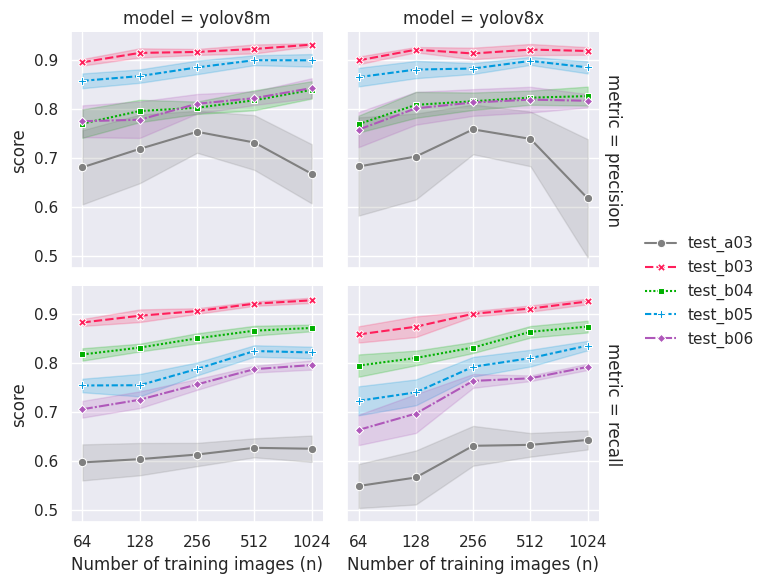

In [24]:
sns.set("notebook")

g = sns.FacetGrid(
    data_fig.\
        query("metric in ['precision', 'recall']").\
            query("test_split not in ['test_b01', 'test_a01', 'test_a02']"),
    col="model",
    row="metric",
    # col_order=["precision", "recall"],
    # col_wrap=2,
    margin_titles=True,
    sharey=True,
)
g.map_dataframe(sns.lineplot, 
    x="n", y="score", 
    hue="test_split", style="test_split",
    # hue_order=["0_all", "b_light", "a2_s2t", "a1_t2s", "c_external"],
    # style_order=["0_all", "b_light", "a2_s2t", "a1_t2s", "c_external"],
    err_style="band", errorbar=("se", 2),
    markers=True,
    palette=["Grey", "#FF1F5B", "#00B000", "#009ADE", "#AF58BA"],)
# title
# g.figure.suptitle("Model Generalization in each Data Configuration")
g.set(
    xscale="log",
    xticks=[2**i for i in range(6, 11)],
    xticklabels=[2**i for i in range(6, 11)],
    xlabel="Number of training images (n)",)
g.figure.subplots_adjust(right=1.2)
g.add_legend()
g.figure.set_size_inches(8, 6)